# 损失函数
- 神经网络使用训练数据进行学习，并使用测试数据评价学习到模型的泛化能力。
- 神经网络的学习以损失函数(表示网络性能的恶劣程度)为指标，更新权重参数，以使损失函数的值减少。损失函数一般使用**均方误差**和**交叉熵误差**等。
<div align="center">

| 特征 | 均方误差 (MSE) | 交叉熵误差 (Cross Entropy) |
| :--- | :--- | :--- |
| **核心任务** | 回归问题（预测具体数值） | 分类问题（预测类别概率） |
| **衡量方式** | 像计算题判卷，看答案与标准答案的**数值差距** | 像选择题判卷，看**预测正确的概率**有多大 |
| **对误差的敏感性** | 对大的误差更敏感 | 对概率的“信心”更敏感，鼓励模型做出自信的预测 |
</div>

- 均方误差表示为：$$E=\frac 1 2 \sum_k(y_k - t_k)^2$$
  交叉熵误差表示为：$$E=-\sum_kt_k \log y_k$$
  $y_k$表示神经网络的输出，$t_k$表示监督数据(one-hot表示)，k表示数据的维数。
- 在进行神经网络的学习时，不能将精度作为指标，否则，模型参数的导数在绝大多数地方都会变成0。
# 数值微分
# 梯度法
- 梯度表示各点处的函数值减小最多的方向。
- 通过不断的沿梯度方向前进，逐渐减少函数值的过程就是**梯度法**。一般使用**随机梯度下降法(SGD)**。
$$ f(x_0,x_1) = x_0^2 + x_1^2$$ $$x_0 = x_0 - \eta\frac {∂f}{∂x_0}$$ $$x_1 = x_1 - \eta\frac {∂f}{∂x_1}$$
$\eta$表示更新量，也称为**学习率**。这个值不能够过大或者过小。
# 学习算法的实现
1. 步骤一：从训练集中随机选出一部分数据，这部分数据称为mini-batch。我们的目标是减少mini-batch的损失函数的值。
2. 步骤二：为了减少mini-batch的损失函数的值，需要求出各个权重参数的梯度。梯度表示损失函数的值减少最多的方向。
3. 步骤三：将权重参数沿梯度方向进行微小更新。
4. 步骤四：重复以上步骤

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
def numerical_diff(f, x):
    """
    使用中心差分法计算函数在x点处的数值导数（梯度）
    
    参数:
    f: 目标函数
    x: 需要计算导数的点
    
    返回:
    float: 函数在x点处的导数值
    """
    h = 1e-4 # 0.0001，设置一个极小的步长以避免舍入误差
    return (f(x+h) - f(x-h)) / (2*h)  # 中心差分公式，比单边差分更精确


def function_1(x):
    """
    示例函数：f(x) = 0.01x² + 0.1x
    """
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    """
    计算函数f在x点处的切线函数
    
    参数:
    f: 目标函数
    x: 切点位置
    
    返回:
    function: 表示切线的函数
    """
    d = numerical_diff(f, x)  # 计算函数在x点处的导数（切线斜率）
    print(d)  # 打印导数值用于调试或观察
    y = f(x) - d*x  # 计算切线在y轴上的截距
    return lambda t: d*t + y  # 返回切线函数
     
# 生成x轴数据，从0到20，步长为0.1
x = np.arange(0.0, 20.0, 0.1)
# 计算函数在x各点处的值
y = function_1(x)

# 设置图表标签
plt.xlabel("x")
plt.ylabel("f(x)")

# 计算函数在x=5处的切线
tf = tangent_line(function_1, 5)
y2 = tf(x)  # 计算切线在x各点处的值

# 绘制原函数曲线和切线
plt.plot(x, y)   # 绘制原函数曲线
plt.plot(x, y2)  # 绘制切线
plt.show()  # 显示图表

C:\Users\86159\AppData\Local\Temp\ipykernel_15196\4048512308.py:116: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend() # 显示图例


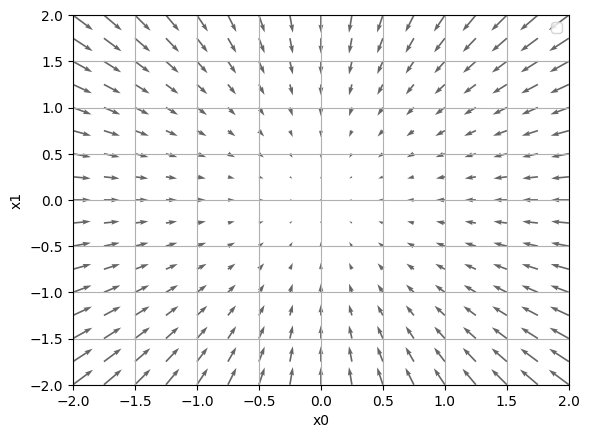

In [ ]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt
def _numerical_gradient_no_batch(f, x):
    """
    计算单点数值梯度（中心差分法）
    
    参数:
    f: 目标函数
    x: 需要计算梯度的点（numpy数组）
    
    返回:
    grad: 函数在x点处的梯度向量
    """
    h = 1e-4 # 0.0001，微小步长以避免舍入误差
    grad = np.zeros_like(x) # 创建与x形状相同的全零数组存储梯度
    
    # 对x的每个分量分别计算偏导数
    for idx in range(x.size):
        tmp_val = x[idx] # 保存当前值
        
        # 计算f(x+h)
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        # 计算f(x-h)
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        # 使用中心差分公式计算该分量的偏导数[1,7](@ref)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 还原值，避免改变原始数据
        
    return grad

def numerical_gradient(f, X):
    """
    数值梯度计算函数（支持批量处理）
    
    参数:
    f: 目标函数
    X: 单个点或点集
    
    返回:
    梯度值或梯度向量集
    """
    if X.ndim == 1:
        # 单点情况，直接计算梯度
        return _numerical_gradient_no_batch(f, X)
    else:
        # 多点情况，对每个点分别计算梯度
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):# 内置函数，生成 (索引, 元素)元组的迭代器,迭代内容：(0, 'A'), (1, 'B'), (2, 'C')
            # 对每个点计算梯度
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad

def function_2(x):
    """
    示例函数：f(x) = x₀² + x₁² （二维二次函数）
    
    参数:
    x: 输入向量或向量集
    
    返回:
    函数值或函数值集合
    """
    if x.ndim == 1:
        # 单点情况，计算各分量平方和
        return np.sum(x**2)
    else:
        # 多点情况，沿指定轴计算平方和
        return np.sum(x**2, axis=1)

def tangent_line(f, x):
    """
    计算函数在某点的切线函数[7](@ref)
    
    参数:
    f: 目标函数
    x: 切点位置
    
    返回:
    切线函数
    """
    d = numerical_gradient(f, x) # 计算梯度（切线斜率）
    print(d) # 打印梯度值
    y = f(x) - d*x # 计算切线截距
    return lambda t: d*t + y # 返回切线函数
    
# 创建网格点：x0从-2到2.5，步长0.25；x1同样范围
x0 = np.arange(-2, 2.5, 0.25)
x1 = np.arange(-2, 2.5, 0.25)

# 生成网格坐标矩阵
X, Y = np.meshgrid(x0, x1)

# 将网格矩阵展平为一维数组
X = X.flatten()
Y = Y.flatten()

# 计算每个网格点处的梯度[2,7](@ref)
grad = numerical_gradient(function_2, np.array([X, Y]))

# 创建图形并绘制梯度场（负梯度方向）
plt.figure()
# 使用quiver绘制箭头图，显示负梯度方向（函数下降最快方向）[7](@ref)
plt.quiver(X, Y, -grad[0], -grad[1], angles="xy", color="#666666")
plt.xlim([-2, 2]) # 设置x轴范围
plt.ylim([-2, 2]) # 设置y轴范围
plt.xlabel('x0') # x轴标签
plt.ylabel('x1') # y轴标签
plt.grid() # 显示网格
plt.legend() # 显示图例
plt.draw() # 绘制图形
plt.show() # 显示图形

In [ ]:
import numpy as np

# ================================
# 激活函数和辅助函数定义
# ================================

def softmax(x):
    """
    softmax函数：将输入向量归一化为概率分布
    防止数值溢出时，先减去最大值
    """
    if x.ndim == 2:  # 如果输入是二维（批量输入）
        x = x.T  # 转置，使得每列是一个样本
        x = x - np.max(x, axis=0)  # 对每列减去最大值，防止指数溢出
        y = np.exp(x) / np.sum(np.exp(x), axis=0)  # softmax公式
        return y.T  # 再转回来
    # 如果是一维数据
    x = x - np.max(x)
    return np.exp(x) / np.sum(np.exp(x))

def sigmoid(x):
    """sigmoid激活函数，将输入压缩到(0,1)之间"""
    return 1 / (1 + np.exp(-x))

def sigmoid_grad(x):
    """sigmoid函数的导数，用于反向传播"""
    return (1.0 - sigmoid(x)) * sigmoid(x)

def cross_entropy_error(y, t):
    """
    交叉熵损失函数（Cross Entropy Error）
    y：网络输出（经过softmax）
    t：真实标签（可以是one-hot或类别索引）
    """
    #当只传入单个样本（非批量）时，y 与 t 很可能是一维数组（shape 例如 (C,)，C 是类别数）。但后续代码假定的是批量处理（二维：(batch_size, C)），为了统一处理，先把一维转换成二维。
    if y.ndim == 1:  # 如果是一维数组，调整为二维 
        t = t.reshape(1, t.size)
        y = y.reshape(1, y.size)
    #one-hot 编码：每个样本是长度为 C 的向量，真实类别对应位置为 1
    if t.size == y.size:  # 若t为one-hot编码，则转换为类别索引
        t = t.argmax(axis=1)
    batch_size = y.shape[0]  # 批量大小
    # 加上1e-7防止log(0)
    return -np.sum(np.log(y[np.arange(batch_size), t] + 1e-7)) / batch_size


# ================================
# 三层神经网络定义
# ================================

class ThreeLayerNet:
    def __init__(self, input_size, hidden1_size, hidden2_size, output_size, weight_init_std=0.01):
        """
        初始化网络参数
        input_size: 输入层神经元个数
        hidden1_size: 第一隐藏层神经元个数
        hidden2_size: 第二隐藏层神经元个数
        output_size: 输出层神经元个数
        weight_init_std: 权重初始化标准差（控制初始权重的范围）
        """
        self.params = {}
        # 第一层权重和偏置
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden1_size)
        self.params['b1'] = np.zeros(hidden1_size)
        # 第二层权重和偏置
        self.params['W2'] = weight_init_std * np.random.randn(hidden1_size, hidden2_size)
        self.params['b2'] = np.zeros(hidden2_size)
        # 第三层权重和偏置（输出层）
        self.params['W3'] = weight_init_std * np.random.randn(hidden2_size, output_size)
        self.params['b3'] = np.zeros(output_size)

    def predict(self, x):
        """
        前向传播：根据输入x计算输出y
        """
        # 取出参数
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']

        # 第一层（输入层 -> 隐藏层1）
        a1 = np.dot(x, W1) + b1      # 线性变换
        z1 = sigmoid(a1)             # 激活函数

        # 第二层（隐藏层1 -> 隐藏层2）
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)

        # 第三层（隐藏层2 -> 输出层）
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)              # 输出层使用softmax得到概率

        return y

    def loss(self, x, t):
        """
        计算损失函数
        x: 输入数据
        t: 真实标签
        """
        y = self.predict(x)  # 前向传播得到预测值
        return cross_entropy_error(y, t)  # 计算交叉熵损失

    def accuracy(self, x, t):
        """
        计算准确率
        """
        y = self.predict(x)
        y = np.argmax(y, axis=1)  # 预测类别
        t = np.argmax(t, axis=1)  # 真实类别
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy

    def gradient(self, x, t):
        """
        通过反向传播法计算梯度
        返回每个参数的梯度（W1, b1, W2, b2, W3, b3）
        """
        # 取出参数
        W1, W2, W3 = self.params['W1'], self.params['W2'], self.params['W3']
        b1, b2, b3 = self.params['b1'], self.params['b2'], self.params['b3']
        grads = {}

        batch_num = x.shape[0]  # 样本数量

        # ======= 前向传播 =======
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        z2 = sigmoid(a2)
        a3 = np.dot(z2, W3) + b3
        y = softmax(a3)

        # ======= 反向传播 =======
        # 输出层梯度
        dy = (y - t) / batch_num
        grads['W3'] = np.dot(z2.T, dy)       # W3的梯度
        grads['b3'] = np.sum(dy, axis=0)     # b3的梯度

        # 反传到第二层
        da1 = np.dot(dy, W3.T)               # 传回第二层前的梯度
        dz1 = sigmoid_grad(a2) * da1         # 第二层的激活函数梯度
        grads['W2'] = np.dot(z1.T, dz1)      # W2的梯度
        grads['b2'] = np.sum(dz1, axis=0)    # b2的梯度

        # 反传到第一层
        da2 = np.dot(dz1, W2.T)
        dz2 = sigmoid_grad(a1) * da2
        grads['W1'] = np.dot(x.T, dz2)       # W1的梯度
        grads['b1'] = np.sum(dz2, axis=0)    # b1的梯度

        return grads

train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.0993, 0.1032
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.11236666666666667, 0.1135
train acc, test acc | 0.25065, 0.2507
train acc, test acc | 0.30811666666666665, 0.3139
train acc, test acc | 0.39603333333333335, 0.4056
train acc, test acc | 0.4839833333333333, 0.4841
train acc, test acc | 0.5926666666666667, 0.5903
train acc, test acc | 0.6951666666666667, 0.6988
train acc, test acc | 0.7763333333333333, 0.7799
train acc, test acc | 0.8351333333333333, 0.843
train acc, test acc | 0.8662333333333333, 0.8736
train acc, test acc | 0.8828333333333334, 0.8874
train acc, test acc | 0.8945833333333333, 0.897
train acc, test acc | 0.9020666666666667, 0.9054
train acc, test acc | 0.909516666666

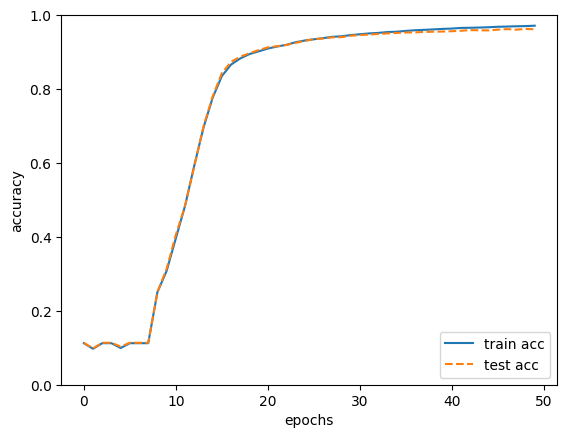

In [ ]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 将父目录加入模块搜索路径，方便导入父目录下的dataset等模块
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist  # 从书本提供的数据集加载函数读取MNIST数据

# ============================
# 读入 MNIST 数据（训练集 + 测试集）
# normalize=True: 将像素值归一化到[0.0, 1.0]
# one_hot_label=True: 将标签转换为 one-hot 表示（例如，数字 3 -> [0,0,0,1,0,...]）
# 返回：
# (x_train, t_train), (x_test, t_test)
# x_train: (60000, 784) 训练图像（展平成784维向量）
# t_train: (60000, 10) 对应的one-hot标签
# x_test, t_test: 测试集
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

# 创建三层网络实例
# input_size=784: 输入层 784 个神经元（28*28）
# hidden1_size=50: 第一隐藏层 50 个神经元
# hidden2_size=30: 第二隐藏层 30 个神经元
# output_size=10: 输出层 10 个神经元（对应 0-9 共10类）
network = ThreeLayerNet(input_size=784, hidden1_size=50, hidden2_size=30, output_size=10)

# 超参数与训练配置
iters_num = 30000  # 迭代总次数（梯度下降的步数）
train_size = x_train.shape[0]  # 训练样本总数（例如 MNIST 通常是 60000）
batch_size = 100  # 每次更新所使用的迷你批量大小（mini-batch）
learning_rate = 0.1  # 学习率（步长）

# 用于记录训练过程的列表（用于绘图/分析）
train_loss_list = []  # 记录每次迭代的损失值（在小批量上的损失）
train_acc_list = []   # 记录按 epoch 计算的训练集准确率（用于观察学习曲线）
test_acc_list = []    # 记录按 epoch 计算的测试集准确率

# 计算每个 epoch 包含多少次迭代（即多少个 mini-batch）
iter_per_epoch = max(train_size / batch_size, 1)

# ============================
# 训练主循环（随机梯度下降 / mini-batch SGD）
# ============================
for i in range(iters_num):
    # 从训练集中随机抽取 batch_size 个样本的下标（有放回采样）
    # np.random.choice 返回一个数组，长度为 batch_size，元素为 0..train_size-1 的随机索引
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]  # 当前 mini-batch 的输入数据，形状 (batch_size, 784)
    t_batch = t_train[batch_mask]  # 当前 mini-batch 的标签（one-hot），形状 (batch_size, 10)
    
    # 计算当前 mini-batch 上的梯度（通过反向传播）
    # network.gradient 返回一个字典 grads，包含每个参数的梯度：
    # grads['W1'], grads['b1'], grads['W2'], grads['b2'], grads['W3'], grads['b3']
    grad = network.gradient(x_batch, t_batch)
    
    # 根据梯度更新参数（使用简单的梯度下降）
    # 对每个参数执行： param = param - learning_rate * grad
    for key in ('W1', 'b1', 'W2', 'b2', 'W3', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    # 计算并记录当前 mini-batch 的损失（用于观察训练过程是否收敛）
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    # 每过若干次迭代（一个 epoch 的次数）就在整个训练集与测试集上计算一次准确率
    # 这里使用 i % iter_per_epoch == 0 判断是否到达 epoch 末尾。但注意 iter_per_epoch 需为整数。
    # 推荐把 iter_per_epoch 写成整数： iter_per_epoch = max(train_size // batch_size, 1)
    if i % iter_per_epoch == 0:
        # 计算训练集和测试集上的准确率（注意：计算上耗时，通常只在 epoch 结束时计算）
        # network.accuracy 函数内部会对整个数据集做一次前向传播并比较最大概率的类别
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        # 打印当前训练/测试准确率，便于监控训练进度
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# ============================
# 绘制训练 / 测试 准确率随 epoch 变化的曲线
# ============================
markers = {'train': 'o', 'test': 's'}  # （可选）标记样式字典，未被 plt.plot 实际使用到，仅作示例
x = np.arange(len(train_acc_list))  # 横轴：记录点数量（通常等于 epoch 数）
plt.plot(x, train_acc_list, label='train acc')              # 训练准确率曲线
plt.plot(x, test_acc_list, label='test acc', linestyle='--')# 测试准确率曲线（虚线）
plt.xlabel("epochs")   # x 轴标签
plt.ylabel("accuracy") # y 轴标签
plt.ylim(0, 1.0)       # y 轴取值范围固定在 [0, 1]
plt.legend(loc='lower right')  # 显示图例，放在右下角
plt.show()  # 显示图形窗口
